<a target="_blank" href="https://colab.research.google.com/github/jgromero/dasoc-ap/blob/main/mnist/mnist.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

# Clasificación con `mnist`

## Descargar datos

In [1]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
y_train = keras.utils.to_categorical(y_train, 10)

## Aproximación directa

Definir arquitectura de la red.

(La capa de salida utiliza un función _softmax_. Esta función transforma las salidas de varias neuronas para que la suma sea 1, emulando valores de probabilidad.)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

simple_model = Sequential([
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

Configurar entrenamiento.

(La función de pérdida es la entropía cruzada. Esta función se utiliza para clasificación con múltiples clases sin ordenar. Penaliza los errores en la predicción otorgando una _penalización_ mayor cuanto menos se acerquen las _probabilidades_ predichas a las esperadas. )

In [4]:
simple_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# "Aplanar" las imágenes
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

history = simple_model.fit(
    x_train_flattened,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7750 - loss: 16.2761 - val_accuracy: 0.9145 - val_loss: 1.6522
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9222 - loss: 1.2112 - val_accuracy: 0.9172 - val_loss: 0.8334
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9387 - loss: 0.5027 - val_accuracy: 0.9276 - val_loss: 0.6433
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9458 - loss: 0.3255 - val_accuracy: 0.9301 - val_loss: 0.5587
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9551 - loss: 0.2339 - val_accuracy: 0.9375 - val_loss: 0.5065


Observar convergencia del modelo.

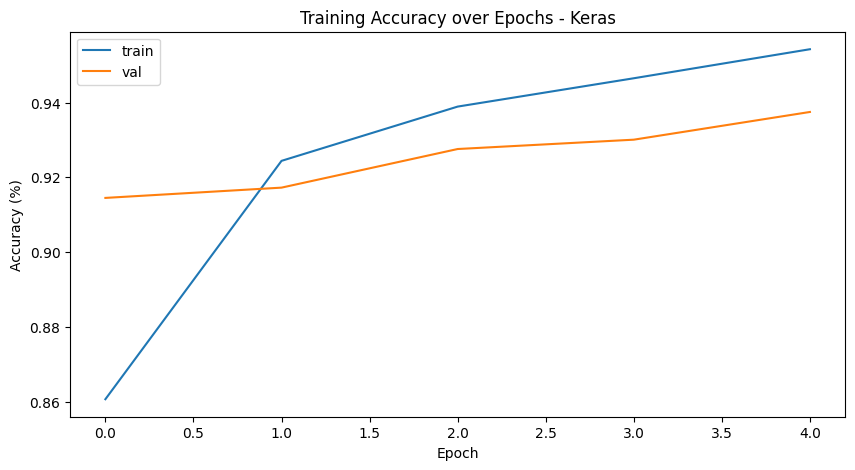

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy over Epochs - Keras')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

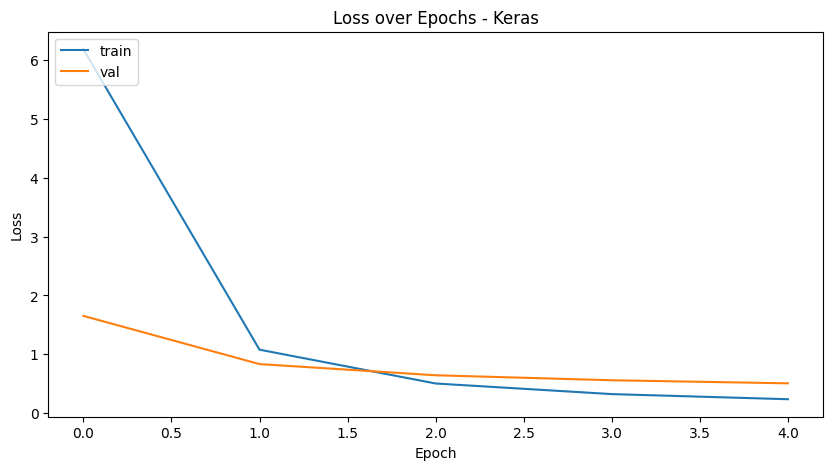

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over Epochs - Keras')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Calcular métricas con conjunto de test.

In [8]:
x_test_flattened   = x_test.reshape(x_test.shape[0], -1)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

test_loss, test_accuracy = simple_model.evaluate(x_test_flattened, y_test_categorical)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9282 - loss: 0.5135
Test loss: 0.4613032341003418
Test accuracy: 0.9358999729156494


Crear matriz de contingencia.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


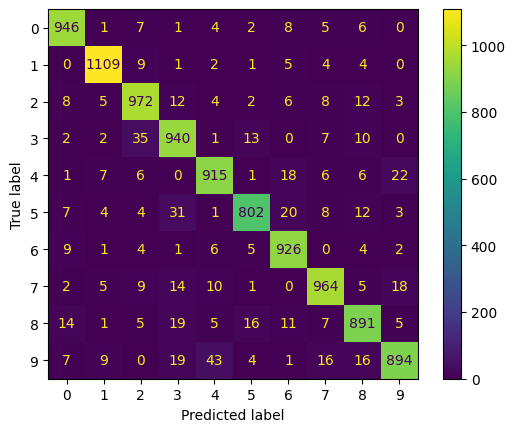

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_pred = simple_model.predict(x_test_flattened)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Utilizando CNN

Definir arquitectura de la red.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=20, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=100, activation='sigmoid'),
    Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configurar entrenamiento.

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Entrenar.

In [12]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.8382 - loss: 0.6694 - val_accuracy: 0.9662 - val_loss: 0.1355
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9701 - loss: 0.1217 - val_accuracy: 0.9752 - val_loss: 0.0898
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9796 - loss: 0.0794 - val_accuracy: 0.9797 - val_loss: 0.0747
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9816 - loss: 0.0667 - val_accuracy: 0.9811 - val_loss: 0.0712
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9832 - loss: 0.0597 - val_accuracy: 0.9820 - val_loss: 0.0677


Observar convergencia del modelo.

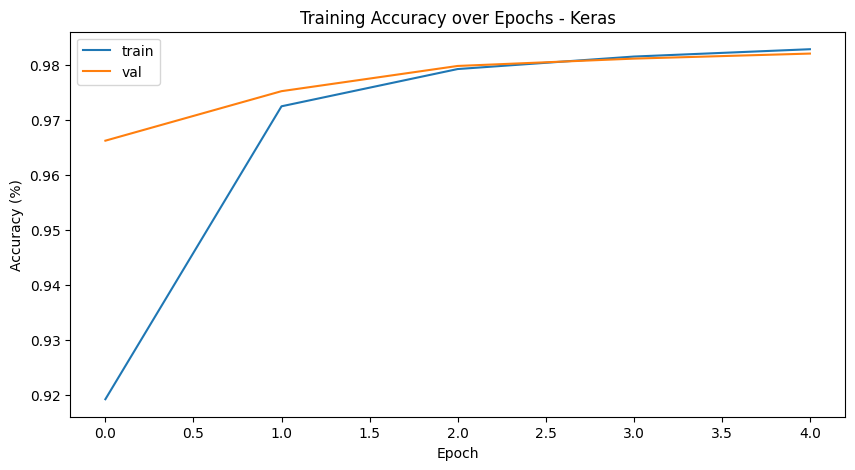

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy over Epochs - Keras')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

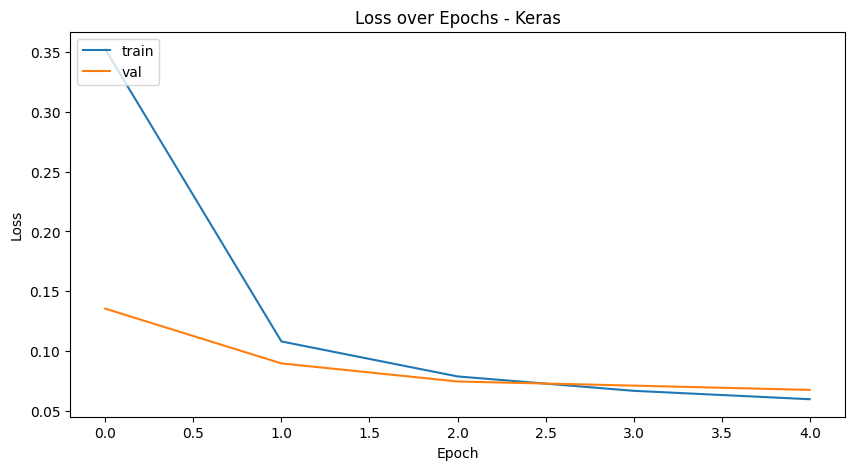

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over Epochs - Keras')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Calcular métricas con conjunto de test.

In [ ]:
y_test_categorical = keras.utils.to_categorical(y_test, 10)

test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9756 - loss: 0.0795
Test loss: 0.06657198071479797
Test accuracy: 0.9794999957084656


Crear matriz de contingencia.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


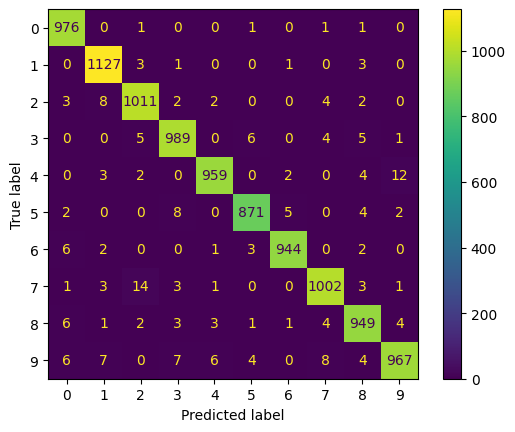

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()